In [207]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key, gkey
import pprint as pprint
import time
from citipy import citipy
import numpy as np
import csv

In [77]:
#Output file to csv
out_put = "data/cities.csv"

In [178]:
#Create empty list to store values for lat/lon and cities
lat_data = []
cities = []

#create about 2000 lat and long for search
lat_rang = np.random.uniform(-90.000, 90.000, size=1500)
lon_rang = np.random.uniform(-180.000, 180.000, size=1500)
lat_data = zip(lat_rang,lon_rang)

#finding the nearest city
for lat_data in lat_data:
    city = citipy.nearest_city(lat_data[0], lat_data[1]).city_name
    
    #finding the unique value and adding to cities
    if city not in cities:
        cities.append(city)
len(cities)

634

In [179]:
# Perform API Calls

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q=" 

#list for storing data
temp_max = []
humdty_list = []
cloud_list = []
windspd_list = []
lat_list = []
lon_list = []
city_name_list = []
city_id_list = []
country_list = []
date_list = []
 
counter = 1

print(f"Beginning Data Retrieval")
print("---"*20)

#loop through the city list and get the json response
for city in cities:
    response = requests.get(query_url + city).json()
    
    #print(json.dumps(response, indent=4, sort_keys=True))
    
    try:
        city_id = response['id']
        city_id_list.append(city_id)
        
        city_name = response['name']
        city_name_list.append(city_name)
        
        country_name = response['sys']['country']
        country_list.append(country_name)
        
        lon = response['coord']['lon']
        lon_list.append(lon)
        
        lat = response['coord']['lat']
        lat_list.append(lat)
        
        temp = response['main']['temp_max']
        temp_max.append(temp)
        
        humdty = response['main']['humidity']
        humdty_list.append(humdty)
        
        cloud = response['clouds']['all']
        cloud_list.append(cloud)
        
        wind_spd = response['wind']['speed']
        windspd_list.append(wind_spd)
        
        date = response["dt"]
        date_list.append(date)
        
        print(f"Processing Record: {counter} | of Set | {counter} | City id: {city_name}")
        counter += 1
    except:
        print("Data unavailable")
        
print("--"*20)
print(f"Data Retrieval Complete")
print("--"*20)

Beginning Data Retrieval
------------------------------------------------------------
Processing Record: 1 | of Set | 1 | City id: Chui
Processing Record: 2 | of Set | 2 | City id: Maceió
Processing Record: 3 | of Set | 3 | City id: Lompoc
Processing Record: 4 | of Set | 4 | City id: Bredasdorp
Processing Record: 5 | of Set | 5 | City id: Hobart
Processing Record: 6 | of Set | 6 | City id: Lüderitz
Processing Record: 7 | of Set | 7 | City id: Biltine
Processing Record: 8 | of Set | 8 | City id: Thabazimbi
Processing Record: 9 | of Set | 9 | City id: Omsukchan
Processing Record: 10 | of Set | 10 | City id: Barrow
Processing Record: 11 | of Set | 11 | City id: Arraial do Cabo
Processing Record: 12 | of Set | 12 | City id: Kapaa
Processing Record: 13 | of Set | 13 | City id: Mataura
Processing Record: 14 | of Set | 14 | City id: Zambezi
Processing Record: 15 | of Set | 15 | City id: Ushuaia
Processing Record: 16 | of Set | 16 | City id: Fairbanks
Processing Record: 17 | of Set | 17 | City

Processing Record: 143 | of Set | 143 | City id: Vila Franca do Campo
Processing Record: 144 | of Set | 144 | City id: Severo-Kuril'sk
Processing Record: 145 | of Set | 145 | City id: Baykit
Processing Record: 146 | of Set | 146 | City id: Carutapera
Processing Record: 147 | of Set | 147 | City id: Dandong
Processing Record: 148 | of Set | 148 | City id: Sawtell
Processing Record: 149 | of Set | 149 | City id: Hamilton
Processing Record: 150 | of Set | 150 | City id: Shingū
Processing Record: 151 | of Set | 151 | City id: Salinas
Processing Record: 152 | of Set | 152 | City id: Tulun
Processing Record: 153 | of Set | 153 | City id: Ulaanbaatar
Processing Record: 154 | of Set | 154 | City id: Orlik
Processing Record: 155 | of Set | 155 | City id: Ca Mau
Data unavailable
Processing Record: 156 | of Set | 156 | City id: Saint-Philippe
Data unavailable
Processing Record: 157 | of Set | 157 | City id: Grindavik
Processing Record: 158 | of Set | 158 | City id: Hong Kong
Processing Record: 15

Processing Record: 279 | of Set | 279 | City id: Marzuq
Processing Record: 280 | of Set | 280 | City id: Ndélé
Processing Record: 281 | of Set | 281 | City id: Walvis Bay
Processing Record: 282 | of Set | 282 | City id: Ashland
Processing Record: 283 | of Set | 283 | City id: Guadalupe y Calvo
Processing Record: 284 | of Set | 284 | City id: Tasiilaq
Processing Record: 285 | of Set | 285 | City id: Ekhabi
Processing Record: 286 | of Set | 286 | City id: Lander
Processing Record: 287 | of Set | 287 | City id: Yushu
Processing Record: 288 | of Set | 288 | City id: Tashigang
Processing Record: 289 | of Set | 289 | City id: Havelock
Processing Record: 290 | of Set | 290 | City id: Saint-Augustin
Processing Record: 291 | of Set | 291 | City id: Noumea
Processing Record: 292 | of Set | 292 | City id: Kiryat Gat
Processing Record: 293 | of Set | 293 | City id: Calamar
Processing Record: 294 | of Set | 294 | City id: Kumul
Processing Record: 295 | of Set | 295 | City id: Takoradze
Processing R

Processing Record: 416 | of Set | 416 | City id: Moose Factory
Processing Record: 417 | of Set | 417 | City id: Nelson Bay
Processing Record: 418 | of Set | 418 | City id: Batagay-Alyta
Data unavailable
Processing Record: 419 | of Set | 419 | City id: Campbeltown
Processing Record: 420 | of Set | 420 | City id: Hofn
Processing Record: 421 | of Set | 421 | City id: Kasongo
Processing Record: 422 | of Set | 422 | City id: Vila Velha
Processing Record: 423 | of Set | 423 | City id: Wasilla
Processing Record: 424 | of Set | 424 | City id: Maniitsoq
Processing Record: 425 | of Set | 425 | City id: Clyde River
Processing Record: 426 | of Set | 426 | City id: Vyartsilya
Data unavailable
Processing Record: 427 | of Set | 427 | City id: Ponazyrevo
Processing Record: 428 | of Set | 428 | City id: Mezen'
Processing Record: 429 | of Set | 429 | City id: Cancún
Processing Record: 430 | of Set | 430 | City id: Kollam
Processing Record: 431 | of Set | 431 | City id: De Aar
Processing Record: 432 | of

Processing Record: 553 | of Set | 553 | City id: Griffin
Processing Record: 554 | of Set | 554 | City id: Rawson
Processing Record: 555 | of Set | 555 | City id: San Ramon
Processing Record: 556 | of Set | 556 | City id: Iroquois Falls
Processing Record: 557 | of Set | 557 | City id: São Paulo de Olivença
Processing Record: 558 | of Set | 558 | City id: Acapulco de Juárez
Processing Record: 559 | of Set | 559 | City id: Beloha
Processing Record: 560 | of Set | 560 | City id: Solwezi
Processing Record: 561 | of Set | 561 | City id: San Rafael
Processing Record: 562 | of Set | 562 | City id: Vysokogornyy
Processing Record: 563 | of Set | 563 | City id: Stabat
Processing Record: 564 | of Set | 564 | City id: Murgab
Processing Record: 565 | of Set | 565 | City id: San Fernando del Valle de Catamarca
Processing Record: 566 | of Set | 566 | City id: Whitehorse
Processing Record: 567 | of Set | 567 | City id: Kearney
Processing Record: 568 | of Set | 568 | City id: Rondonópolis
Processing Rec

In [201]:
# Convert Raw Data to DataFrame

# Export the city data into a .csv.
# Display the DataFrame

city_weather = {"City": city_name_list,
                "Lat": lat_list,
                "Lng": lon_list,
                "Max Temp": temp_max,
                "Humidity": humdty_list,
                "Cloudiness": cloud_list,
                "Wind Speed": windspd_list,
                "Country": country_list,
                "Date": date_list }
city_weather_df = pd.DataFrame(city_weather)

city_weather_df

city_weather_df.style.set_properties(**{'text-align': 'left','border-color':'Black','border-width':'thin','border-style':'solid'}) \
                  .set_table_styles([{'selector':'th','props':[('border','thin solid'),('text-align','left')]}])




In [202]:
#Calculating mean,median, std, min, 25%, 50%, 75%, max
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.300809,14.288571,63.453804,69.006885,48.213425,8.467194,1.602609e+09
std,33.084936,89.647063,20.553219,21.870385,38.127995,6.142881,6.045504e+01
min,-54.800000,-175.200000,11.100000,8.000000,0.000000,0.360000,1.602608e+09
25%,-6.610000,-63.060000,48.650000,55.000000,6.000000,3.560000,1.602609e+09
50%,24.090000,20.650000,69.800000,75.000000,40.000000,6.930000,1.602609e+09
75%,47.620000,88.530000,79.030000,86.000000,90.000000,11.410000,1.602609e+09
max,78.220000,178.420000,106.430000,100.000000,100.000000,41.380000,1.602609e+09


In [205]:
# convert unix time 
date_time = city_weather_df["Date"][0]
date_time_converted = time.strftime("%m/%d/%y", time.localtime(date_time))
date_time_converted

'10/14/20'

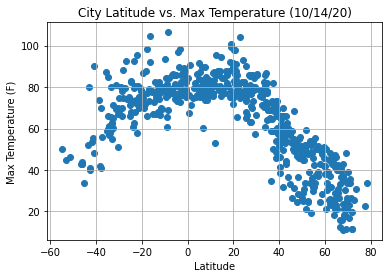

The above plot shows that as you approach latitude 0 the temperature hits the highest


In [218]:
#Plotting the Data

#Latitude vs. Temperature Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"],marker="o")
plt.title(f"City Latitude vs. Max Temperature ({date_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("LatitudevsTemperature.png")
plt.show()

print(f"The above plot shows that as you approach latitude 0 the temperature hits the highest")

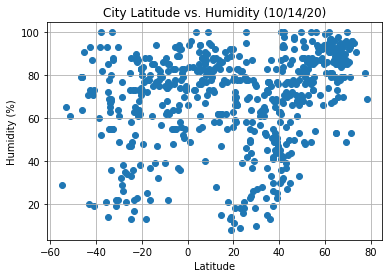

There's no trend between Humidty and Latitude


In [219]:
#Latitude vs. Humidity Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"],marker="o")
plt.title(f"City Latitude vs. Humidity ({date_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("LatitudevsHumidity.png")
plt.show()

print(f"There's no trend between Humidty and Latitude")


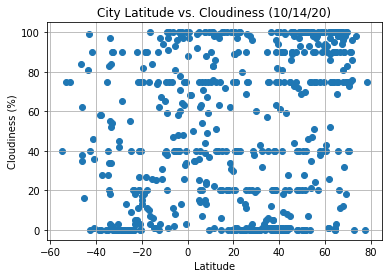

There's no trend between Cloudiness and Latitude


In [220]:
#Latitude vs. Cloudiness Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"],marker="o")
plt.title(f"City Latitude vs. Cloudiness ({date_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("LatitudevsCloudiness.png")
plt.show()

print(f"There's no trend between Cloudiness and Latitude")


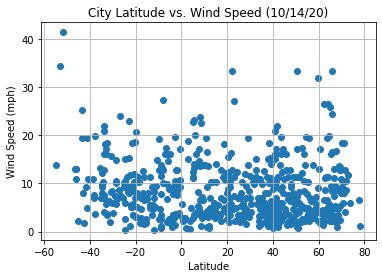

There's no trend between Windspeed and Latitude


In [222]:
#Latitude vs. Wind Speed Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"],marker="o")
plt.title(f"City Latitude vs. Wind Speed ({date_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("LatitudevsWindspeed.png")
plt.show()

print(f"There's no trend between Windspeed and Latitude")